In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_file = pd.read_csv('train.csv')

# cleaning NaN vals

In [5]:
#Finding NaN values in the dataset
train_nan = train_file[train_file.isna().any(axis=1)] 

In [6]:
#looking to fill NaN values in travel_with with 'Alone'
alone_nan = train_nan[['travel_with','total_female','total_male']] 

In [7]:
#Filling all null travel with cells with 'Alone'
train_file['travel_with'].fillna('Alone', inplace=True) 

In [8]:
#Dropping incompatable empty value
train_file.drop(train_file.index[316], inplace=True) 

In [44]:
#Dropping all null female values
train_file['total_female']=train_file['total_female'].dropna() 

In [42]:
#Dropping all male null values
train_file['total_male']=train_file['total_male'].dropna() 

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
18501    1.0
18502    0.0
18503    1.0
18504    1.0
18505    1.0
Name: total_male, Length: 18480, dtype: float64

In [47]:
train_file = train_file.dropna() 
train_file.isnull().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
total_packages           0
total_people             0
total_days               0
continent                0
dtype: int64

# cleaning data (making columns, replacing values, combining, removing outliers, etc)

In [35]:
#Replacing all yes/no with 1/0 respectively
train_file.replace(['Yes', 'No'], [1, 0], inplace=True) 

In [36]:
#making total packages per tour column
train_file['total_packages'] = train_file['package_transport_int'] + train_file['package_accomodation'] + \
train_file['package_food'] + train_file['package_transport_tz'] + train_file['package_sightseeing'] + \
+ train_file['package_guided_tour'] + train_file['package_insurance']

In [37]:
#making total people per tour column
train_file['total_people'] = train_file['total_female'] + train_file['total_male']

In [15]:
#makign total days column
train_file['total_days'] = train_file['night_mainland'] + train_file['night_zanzibar']

In [16]:
#combining all wildlife
train_file['main_activity'].replace('Widlife Tourism', 'Wildlife Tourism', inplace=True)

In [17]:
#Finding outliers in total people
total_people = train_file['total_people'].unique()
sorted_total_people = np.sort(total_people)

In [18]:
#Number of occurences for amount of people on the trip
people_counts = train_file['total_people'].value_counts()

In [19]:
#remove parties > 50
num_people = train_file[train_file['total_people'] > 50].index
train_file.drop(num_people , inplace=True)

In [20]:
#Finding outliers in mainland nights(discuss)
mainland_nights = train_file['night_mainland'].unique() 
sorted_mainland_nights = np.sort(mainland_nights)

In [21]:
#Finding outliers in zanzibar nights(discuss)
zanibar_nights = train_file['night_zanzibar'].unique()
sorted_zanzibar_nights = np.sort(zanibar_nights)

In [22]:
total_days_unique = train_file['total_days'].unique()
sorted_total_days_unique = np.sort(total_days_unique)

In [23]:
num_total_days = train_file[train_file['total_days'] > 180].index
train_file.drop(num_total_days , inplace=True)

In [24]:
#Getting countries where their occurence is less than 10
low_country_count = train_file['country'].value_counts().to_frame()
low_country_count = low_country_count[low_country_count['country'] < 10].index.tolist()

In [25]:
#making a continent column
europe = ['ITALY', 'UNITED KINGDOM', 'FRANCE', 'SWIZERLAND', 'SPAIN', 'DENMARK', 'BELGIUM', 'NETHERLANDS', 'NORWAY',
         'GERMANY','RUSSIA', 'GREECE','POLAND','AUSTRIA','CZECH REPUBLIC', 'IRELAND','SWEDEN', 'FINLAND','LUXEMBOURG', 'ROMANIA', 
         'PORTUGAL', 'SCOTLAND','SLOVAKIA','UKRAIN', 'HUNGARY','TURKEY']
north_america = ['UNITED STATES OF AMERICA', 'CANADA',]
latin_america = ['BRAZIL', 'ARGENTINA', 'URUGUAY','MEXICO', ]
asia = ['INDIA', 'CHINA', 'JAPAN', 'MALAYSIA', 'KOREA', 'THAILAND', 'SINGAPORE', 'PAKISTAN', 'TAIWAN', 'PHILIPINES',]
middle_east = ['LEBANON', 'ISRAEL', 'UNITED ARAB EMIRATES', 'QATAR', 'OMAN', 'UAE', 'SAUD ARABIA',]
oceania = ['AUSTRALIA', 'NEW ZEALAND',]
africa = ['RWANDA','NIGERIA', 'ZAMBIA', 'ZIMBABWE', 'SOUTH AFRICA', 'KENYA', 'DRC', 'UGANDA', 'CONGO', 'BURUNDI', 'NAMIBIA',
         'SUDAN', 'MALAWI','EGYPT', 'SRI LANKA','BOTSWANA', 'COMORO', 'ETHIOPIA','SWAZILAND',
 'MOZAMBIQUE', 'MAURITIUS']
other = ['CHILE', 'SERBIA', 'BAHRAIN', 'COLOMBIA', 'VIETNAM', 'MALT', 'KUWAIT', 'INDONESIA','GHANA', 'TRINIDAD TOBACCO',
         'CROATIA','BULGARIA','MADAGASCAR','CAMEROON','ICELAND','LATVIA','LITHUANIA','ALGERIA','MORROCO','BERMUDA','SLOVENIA',
         'SOMALI','YEMEN','VENEZUELA','ANGOLA','SEYCHELLES','NEPAL','TANZANIA','SENEGAL','JAMAICA','GAMBIA','PERU','IRAN',
         'LESOTHO','COSTARICA','GEORGIA','BOSNIA','DOMINICA','CAMBODIA','BURGARIA','AFGHANISTAN','ECUADO','PAPUA NEW GUINEA','ARMENIA',
         'CYPRUS','MACEDONIA','IVORY COAST','MONECASQUE','BARBADOS','MONTENEGRO','DJIBOUT','TUNISIA','LIBERIA','BANGLADESH','ERITREA',
         'NIGER','ESTONIA','CAPE VERDE','JORDAN']

conditions = [train_file['country'].isin(europe), 
        train_file['country'].isin(north_america), train_file['country'].isin(latin_america),
        train_file['country'].isin(asia), train_file['country'].isin(middle_east), 
        train_file['country'].isin(oceania), train_file['country'].isin(africa), 
         train_file['country'].isin(other)]

values = ['EUROPE', 'NORTH AMERICA', 'LATIN AMERICA', 'ASIA', 'MIDDLE EAST', 'OCEANIA', 'AFRICA', 'OTHER']
train_file['continent'] = np.select(conditions, values)

In [26]:
#Replacing cost categories with representative numerical values
train_file.replace({'Lower Cost' : 1, 
                    'Low Cost' : 2, 
                    'Normal Cost' : 3, 
                    'High Cost' : 4, 
                    'Higher Cost' : 5, 
                    'Highest Cost' : 6}, inplace=True)

# getting correlations / other statistics 

## overall table stats

In [296]:
#getting the correlations of the entire training table
training_correlations = train_file.corr()

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_23750/1630082594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  training_correlations = train_file.corr()


In [297]:
#getting the correlations of the cost category
training_corr_series = training_correlations['cost_category']

In [298]:
#getting correlations over 0.5
pos_cost_correlations = training_correlations[training_correlations['cost_category'] > 0.5]['cost_category']

## continent stats

In [338]:
#Counting/normalizing cost categories across continents
cont_vs_cost = pd.crosstab(train_file.continent, train_file.cost_category, normalize='columns')
cont_vs_cost

cost_category,1,2,3,4,5,6
continent,,,,,,
AFRICA,0.697584,0.457801,0.210757,0.062296,0.041186,0.198324
ASIA,0.049493,0.079284,0.074277,0.047062,0.029036,0.011173
EUROPE,0.153936,0.299233,0.474753,0.618335,0.515445,0.402235
LATIN AMERICA,0.000779,0.000639,0.006952,0.008433,0.006590,0.008380
MIDDLE EAST,0.017537,0.028133,0.034577,0.022307,0.016063,0.013966
NORTH AMERICA,0.056898,0.097826,0.144530,0.186888,0.319399,0.245810
OCEANIA,0.013640,0.019182,0.037688,0.044886,0.063839,0.108939
OTHER,0.010133,0.017903,0.016465,0.009793,0.008443,0.011173


In [339]:
#getting mean cost_category across continents
cont_cost_mean = train_file.groupby('continent', as_index=False).cost_category.mean()
cont_cost_mean

,continent,cost_category
0,AFRICA,2.169312
1,ASIA,3.091282
2,EUROPE,3.770232
3,LATIN AMERICA,3.925234
4,MIDDLE EAST,3.268623
5,NORTH AMERICA,4.056515
6,OCEANIA,4.021656
7,OTHER,3.222222


In [301]:
#descriptive stats based on continent
descriptive_cont = train_file.groupby('continent').cost_category.describe()

In [302]:
#correlations on attributes over 0.5 grouped by continent
cont_pos_corr = train_file.groupby('continent')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

## age group stats

In [303]:
#Counting/normalizing cost categories across age groups
age_vs_cost = pd.crosstab(train_file.age_group, train_file.cost_category, normalize='columns')

In [304]:
#getting mean cost_category across ages
age_cost_mean = train_file.groupby('age_group', as_index=False).cost_category.mean()

In [305]:
#descriptive stats based on age groups
descriptive_age = train_file.groupby('age_group').cost_category.describe()

In [306]:
#correlations on attributes over 0.5 grouped by age groups
age_pos_corr = train_file.groupby('age_group')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

## traveler group stats

In [307]:
#Counting/normalizing cost categories across travel group type
travelers_vs_cost = pd.crosstab(train_file.travel_with, train_file.cost_category, normalize='columns')

In [308]:
#getting mean cost_category across travel group type
travelers_cost_mean = train_file.groupby('travel_with', as_index=False).cost_category.mean()

In [309]:
#descriptive stats based on travel group type
descriptive_travelers = train_file.groupby('travel_with').cost_category.describe()

In [310]:
#correlations on attributes over 0.5 grouped by travel group type
travelers_pos_corr = train_file.groupby('travel_with')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

## age group stats

In [311]:
#Counting/normalizing cost categories across travel purpose
purpose_vs_cost = pd.crosstab(train_file.purpose, train_file.cost_category, normalize='columns')

In [312]:
#getting mean cost_category across purpose types
purpose_cost_mean = train_file.groupby('purpose', as_index=False).cost_category.mean()

In [313]:
#descriptive stats based on purpose type
descriptive_purpose = train_file.groupby('purpose').cost_category.describe()

In [314]:
#correlations on attributes over 0.5 grouped by purpose type
purpose_pos_corr = train_file.groupby('purpose')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

## main activity stats

In [315]:
#Counting/normalizing cost categories across main activities
mainact_vs_cost = pd.crosstab(train_file.main_activity, train_file.cost_category, normalize='columns')

In [316]:
#getting mean cost_category across mainact types
mainact_cost_mean = train_file.groupby('main_activity', as_index=False).cost_category.mean()

In [317]:
#descriptive stats based on main act type
descriptive_mainact = train_file.groupby('main_activity').cost_category.describe()

In [318]:
#correlations on attributes over 0.5 grouped by main act type
mainact_pos_corr = train_file.groupby('main_activity')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

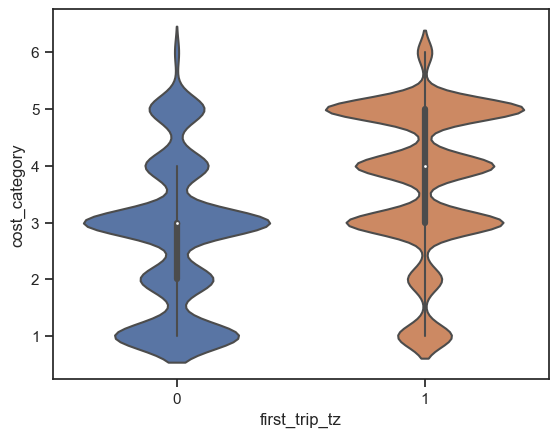

In [196]:
first_trip_graph = sns.violinplot(y=train_file.cost_category, x=train_file.first_trip_tz)

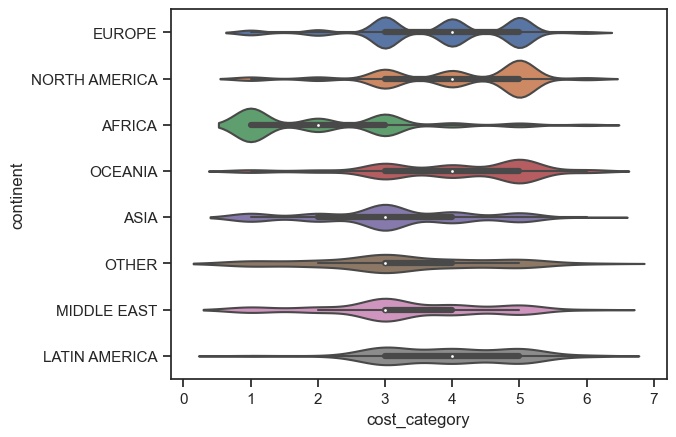

In [191]:
continent_graph = sns.violinplot(y=train_file.continent, x=train_file.cost_category)

<Axes: xlabel='cost_category', ylabel='age_group'>

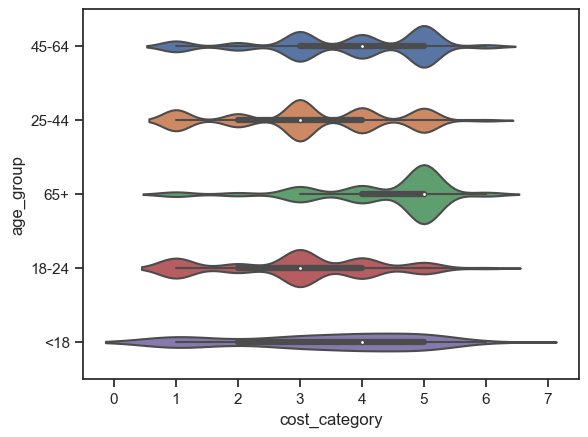

In [162]:
age_graph = sns.violinplot(y=train_file.age_group, x=train_file.cost_category)
age_graph

<Axes: xlabel='cost_category', ylabel='travel_with'>

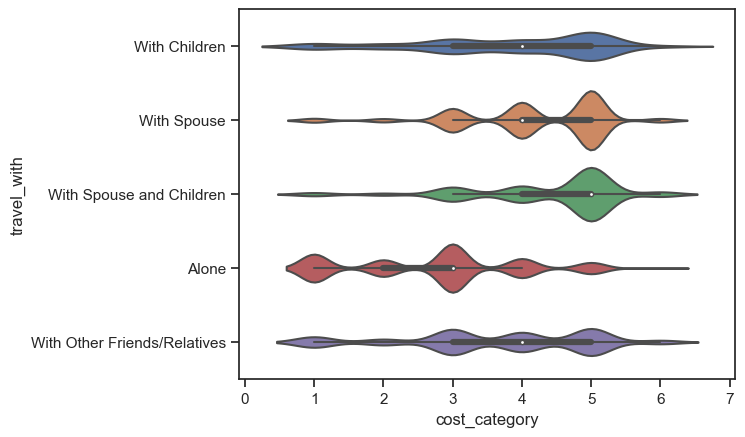

In [161]:
travelers_graph = sns.violinplot(y=train_file.travel_with, x=train_file.cost_category)
travelers_graph

<Axes: xlabel='cost_category', ylabel='purpose'>

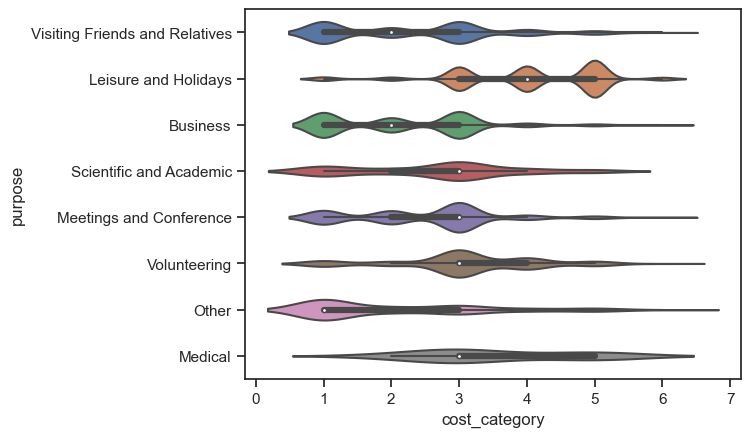

In [160]:
purpose_graph = sns.violinplot(y=train_file.purpose, x=train_file.cost_category)
purpose_graph

<Axes: xlabel='cost_category', ylabel='main_activity'>

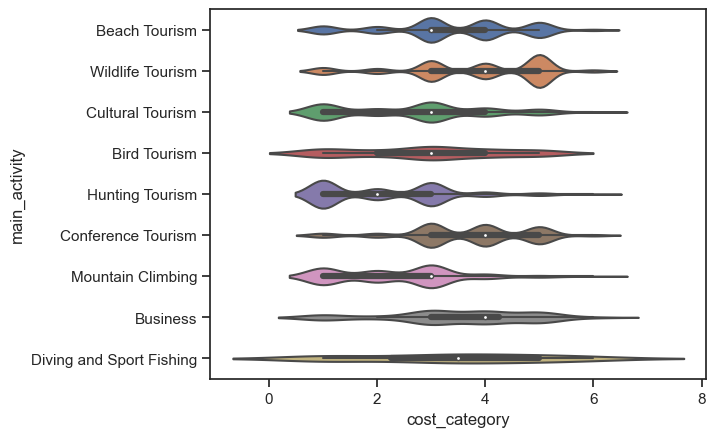

In [186]:
activity_graph = sns.violinplot(y=train_file.main_activity, x=train_file.cost_category)
activity_graph

In [48]:
train_file.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int      int64
package_accomodation       int64
package_food               int64
package_transport_tz       int64
package_sightseeing        int64
package_guided_tour        int64
package_insurance          int64
night_mainland             int64
night_zanzibar             int64
first_trip_tz              int64
cost_category              int64
total_packages             int64
total_people             float64
total_days                 int64
continent                 object
dtype: object

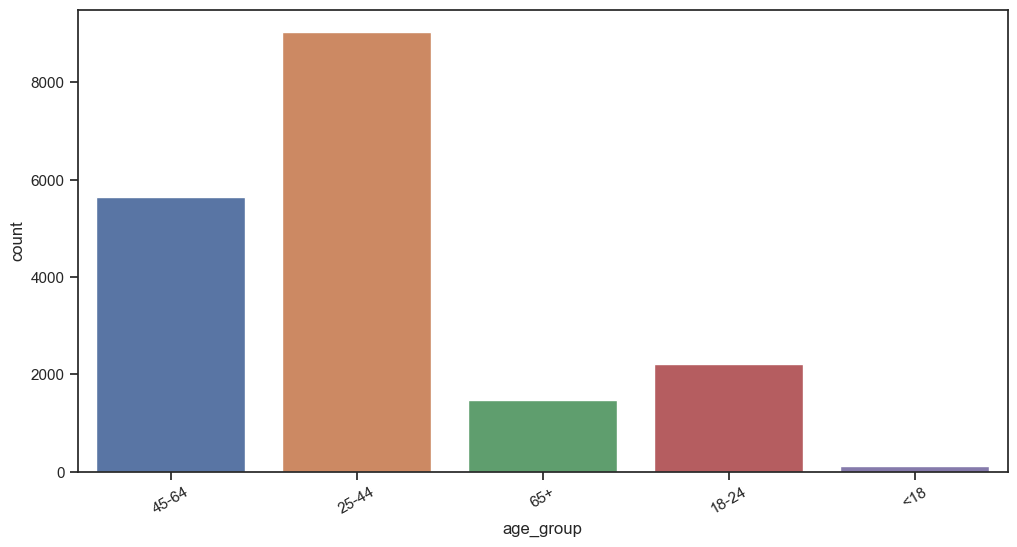

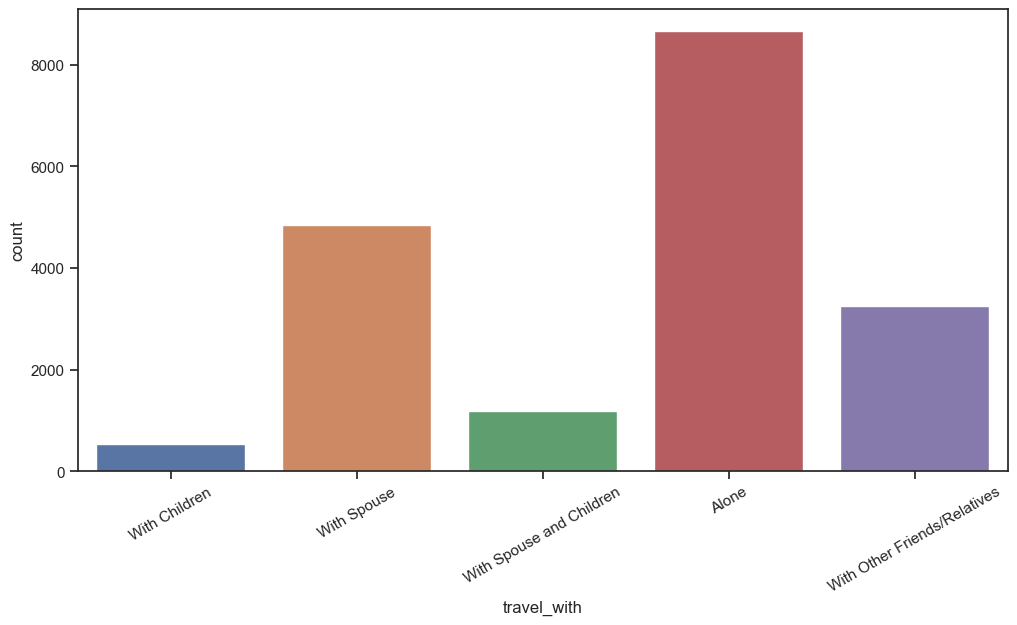

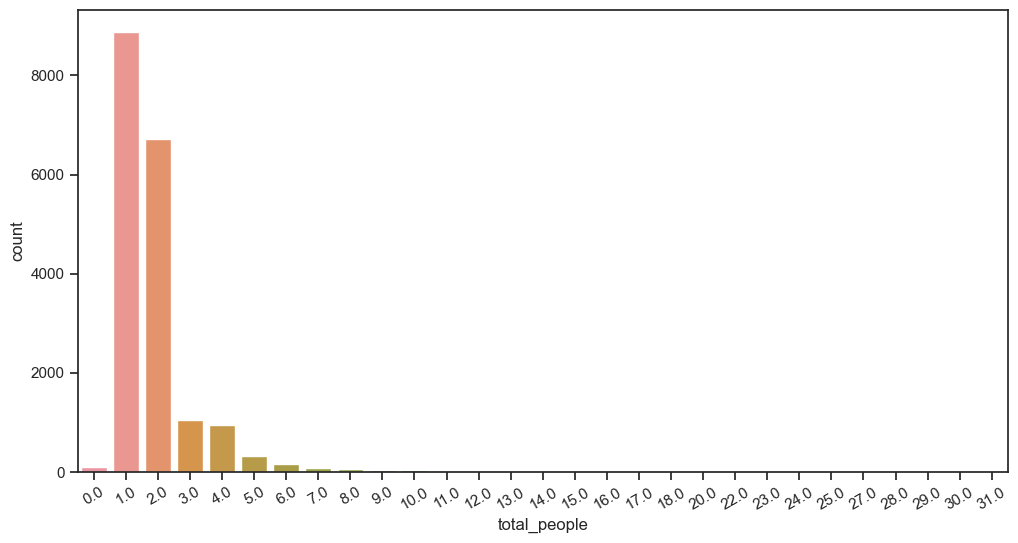

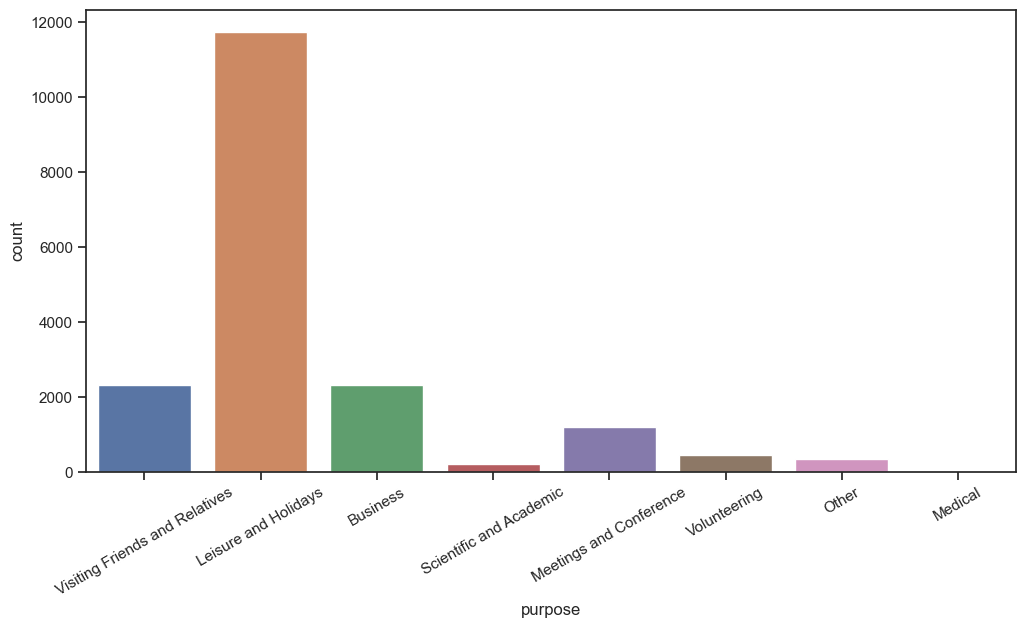

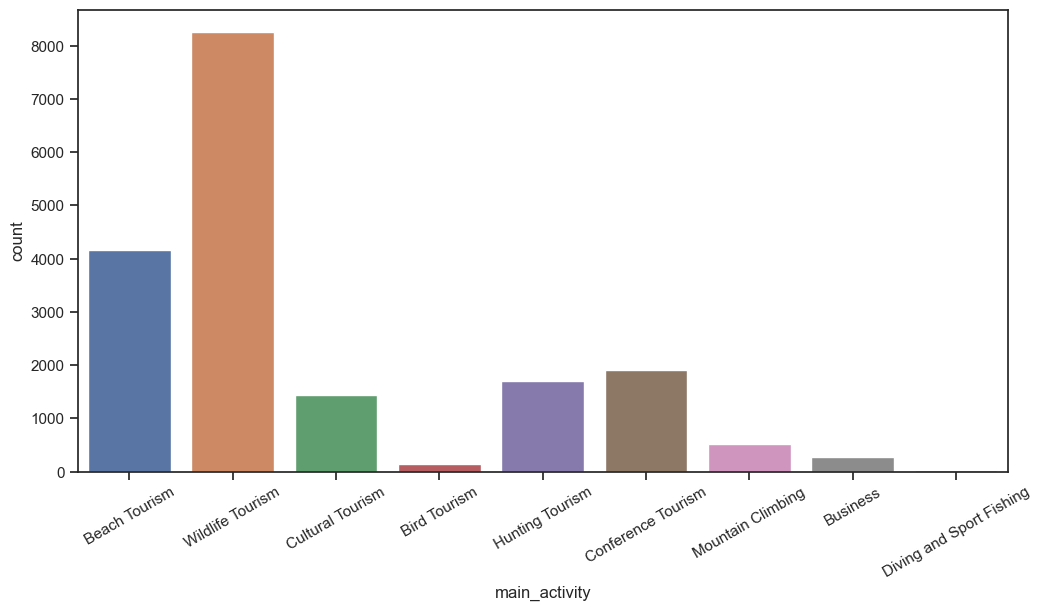

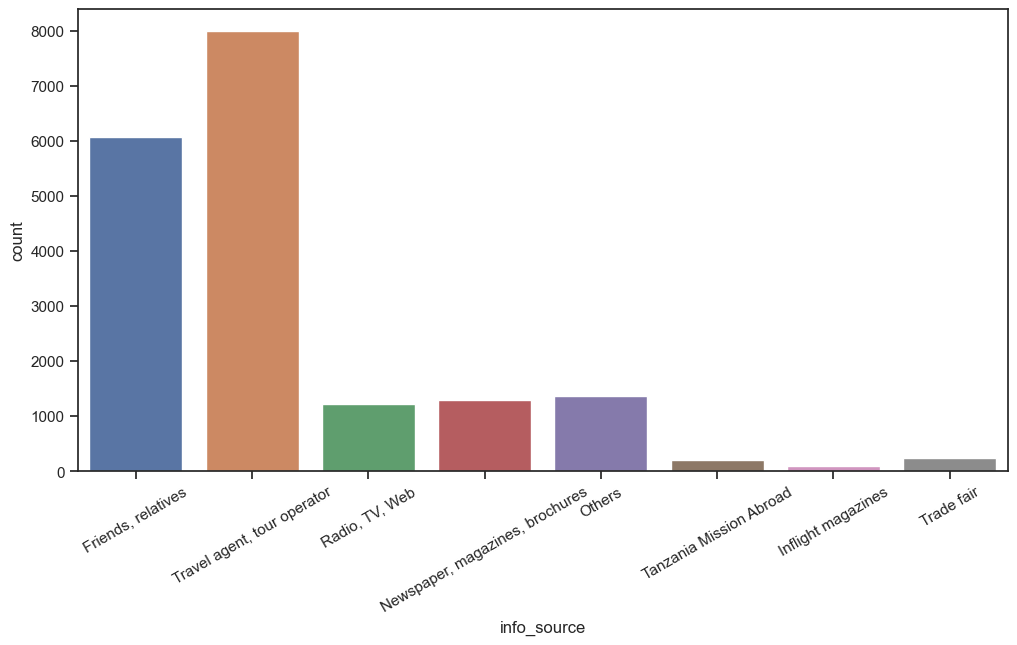

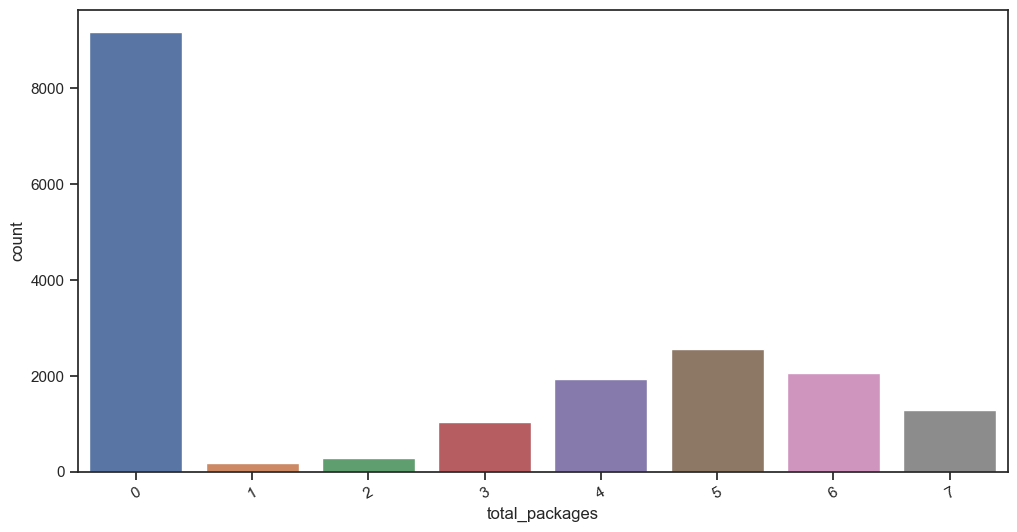

In [199]:
for k in ['age_group','travel_with','total_people','purpose', 'main_activity','info_source','total_packages']:
    plt.figure(figsize=(12,6))
    plot=sns.countplot(x=k,data=train_file)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

In [49]:
train_file.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int      int64
package_accomodation       int64
package_food               int64
package_transport_tz       int64
package_sightseeing        int64
package_guided_tour        int64
package_insurance          int64
night_mainland             int64
night_zanzibar             int64
first_trip_tz              int64
cost_category              int64
total_packages             int64
total_people             float64
total_days                 int64
continent                 object
dtype: object

In [91]:
y = train_file['cost_category']
train_file.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int      int64
package_accomodation       int64
package_food               int64
package_transport_tz       int64
package_sightseeing        int64
package_guided_tour        int64
package_insurance          int64
night_mainland             int64
night_zanzibar             int64
first_trip_tz              int64
cost_category              int64
total_packages             int64
total_people             float64
total_days                 int64
continent                 object
dtype: object

In [96]:
dropped=train_file[['total_people','total_packages','total_days','continent','first_trip_tz','package_accomodation','package_food']]
dropped_dummies = pd.get_dummies(dropped)

In [102]:
X=dropped_dummies
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
dtree_predictions


dtree_predictions_proba = dtree_model.predict_proba(X_test)
dtree_predictions_proba

array([[0.05008489, 0.05772496, 0.44651952, 0.25976231, 0.18081494,
        0.00509338],
       [0.03867403, 0.02872928, 0.4       , 0.38563536, 0.13701657,
        0.00994475],
       [0.01157286, 0.00789058, 0.06312467, 0.1662283 , 0.70962651,
        0.04155708],
       ...,
       [0.01157286, 0.00789058, 0.06312467, 0.1662283 , 0.70962651,
        0.04155708],
       [0.58699187, 0.22276423, 0.17235772, 0.01300813, 0.00487805,
        0.        ],
       [0.05008489, 0.05772496, 0.44651952, 0.25976231, 0.18081494,
        0.00509338]])